# EDA - Exploratory Data Analysis
---

Import libraries:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec
import plotly.express as px

---

## Import cleaned data parquet file

Import the cleaned data that was the outut of the 1st notebook

View the dataframe as a refresher of what we are dealing with

In [2]:
df = pd.read_parquet("../data/mental_health_social_media_dataset_cleaned.parquet")

df.head()

,date,year,month,month_name,week_number,day_of_week,age,age_group,gender,platform,...,sleep_hours,physical_activity_min,negative_interactions_count,positive_interactions_count,interaction_total,interaction_negative_ratio,anxiety_level,stress_level,mood_level,mental_state
0,2024-01-01,2024,1,Jan,1,Monday,35,35-44,Male,Instagram,...,7.4,28,1,2,3,0.333333,2,7,6,Stressed
1,2024-01-12,2024,1,Jan,2,Friday,24,18-24,Female,Instagram,...,6.7,15,1,3,4,0.250000,3,8,5,Stressed
2,2024-01-06,2024,1,Jan,1,Saturday,26,25-34,Male,Snapchat,...,7.2,24,1,2,3,0.333333,3,7,6,Stressed
3,2024-01-17,2024,1,Jan,3,Wednesday,66,55+,Female,Snapchat,...,8.0,41,0,1,1,0.000000,2,6,6,Stressed
4,2024-01-28,2024,1,Jan,4,Sunday,31,25-34,Male,Snapchat,...,7.1,22,1,2,3,0.333333,3,7,6,Stressed


---

## Look at correlations

Display the numerical correlation figures between all numerical fields:

In [3]:
corr = df.corr(numeric_only=True)
corr

,year,month,week_number,age,daily_screen_time_min,social_media_time_min,sleep_hours,physical_activity_min,negative_interactions_count,positive_interactions_count,interaction_total,interaction_negative_ratio,anxiety_level,stress_level,mood_level
year,1.000000,-0.105944,-0.089047,0.019353,-0.022262,-0.016555,0.022163,0.022500,-0.016838,-0.012389,-0.015853,-0.011514,-0.018284,-0.022238,0.018801
month,-0.105944,1.000000,0.973761,-0.029351,0.025005,0.022945,-0.025315,-0.024814,0.027815,0.012536,0.020550,0.015607,0.030206,0.031580,-0.031900
week_number,-0.089047,0.973761,1.000000,-0.028614,0.022848,0.019385,-0.023346,-0.022622,0.027174,0.010169,0.018599,0.019174,0.027802,0.029205,-0.029335
age,0.019353,-0.029351,-0.028614,1.000000,-0.867197,-0.591235,0.864386,0.866304,-0.422186,-0.450397,-0.496846,-0.276183,-0.567443,-0.748259,0.601122
daily_screen_time_min,-0.022262,0.025005,0.022848,-0.867197,1.000000,0.680839,-0.998553,-0.999627,0.457361,0.524203,0.564036,0.273243,0.629185,0.835955,-0.694937
social_media_time_min,-0.016555,0.022945,0.019385,-0.591235,0.680839,1.000000,-0.679793,-0.680618,0.760760,0.854728,0.925959,0.361717,0.896964,0.882873,-0.867213
sleep_hours,0.022163,-0.025315,-0.023346,0.864386,-0.998553,-0.679793,1.000000,0.998057,-0.455930,-0.523404,-0.562869,-0.272109,-0.627829,-0.834512,0.694124
physical_activity_min,0.022500,-0.024814,-0.022622,0.866304,-0.999627,-0.680618,0.998057,1.000000,-0.457283,-0.524124,-0.563947,-0.273373,-0.628880,-0.835909,0.694838
negative_interactions_count,-0.016838,0.027815,0.027174,-0.422186,0.457361,0.760760,-0.455930,-0.457283,1.000000,0.537068,0.800206,0.804140,0.806103,0.752960,-0.753461
positive_interactions_count,-0.012389,0.012536,0.010169,-0.450397,0.524203,0.854728,-0.523404,-0.524124,0.537068,1.000000,0.935656,0.091969,0.736664,0.692661,-0.682743


Create a heatmap to visually show the correlation:

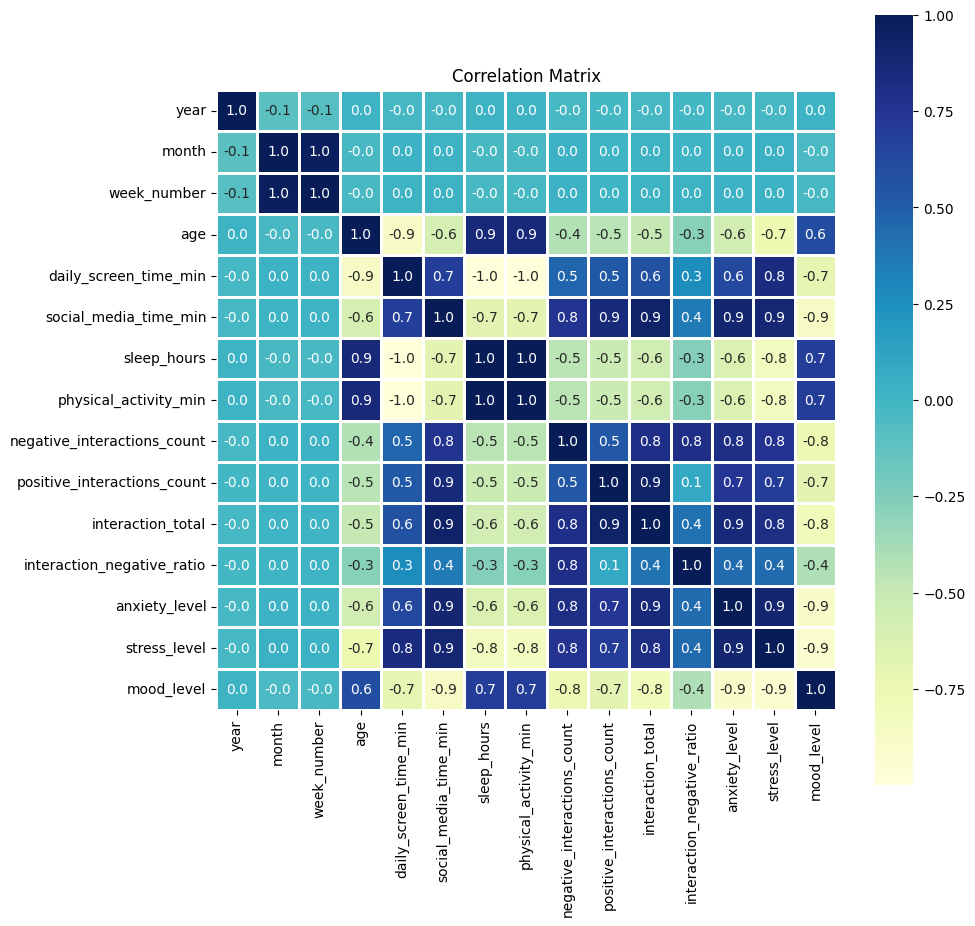

In [4]:
# set figure size
plt.figure(figsize=(10, 10))

# Create a heatmap to visually show the correlation
sns.heatmap(
    corr,
    cmap="YlGnBu",
    square=True,
    linewidths=1,
    linecolor="white",
    annot=True,          # show numbers
    fmt=".1f"            # round to 1 decimal place
)
plt.title("Correlation Matrix")

# Save figure and show
plt.savefig('../charts/correlation_matrix_heatmap.png')
plt.show()

### Correlation Summary

Date variables show almost no correlation with mental state

This suggests the dataset does not capture seasonal mood effects.
The distribution of moods and stress seems stable throughout the observed period.
<br /><br /><br />

Age is a major behavioral separator

Older individuals:
- sleep more (+0.86)
- are more physically active (+0.87)
- use screens less (–0.87)
- use social media less (–0.59)
Very strong age effects shape almost every lifestyle variable.
<br /><br /><br />

Sleep, screen time, and physical activity form an almost perfect inverse triangle

Correlations near +1/-1 reveal deterministic relationships:
- More screen time - much less sleep - much less physical activity
- These variables appear to be generated together
They are not independent and represent the same behavioral dimension.
<br /><br /><br />

Anxiety, stress, and mood are nearly perfectly correlated

This indicates:
- a shared emotional health factor
- mood is the inverse of anxiety/stress


---

## Emotional health vs behaviour pair plot

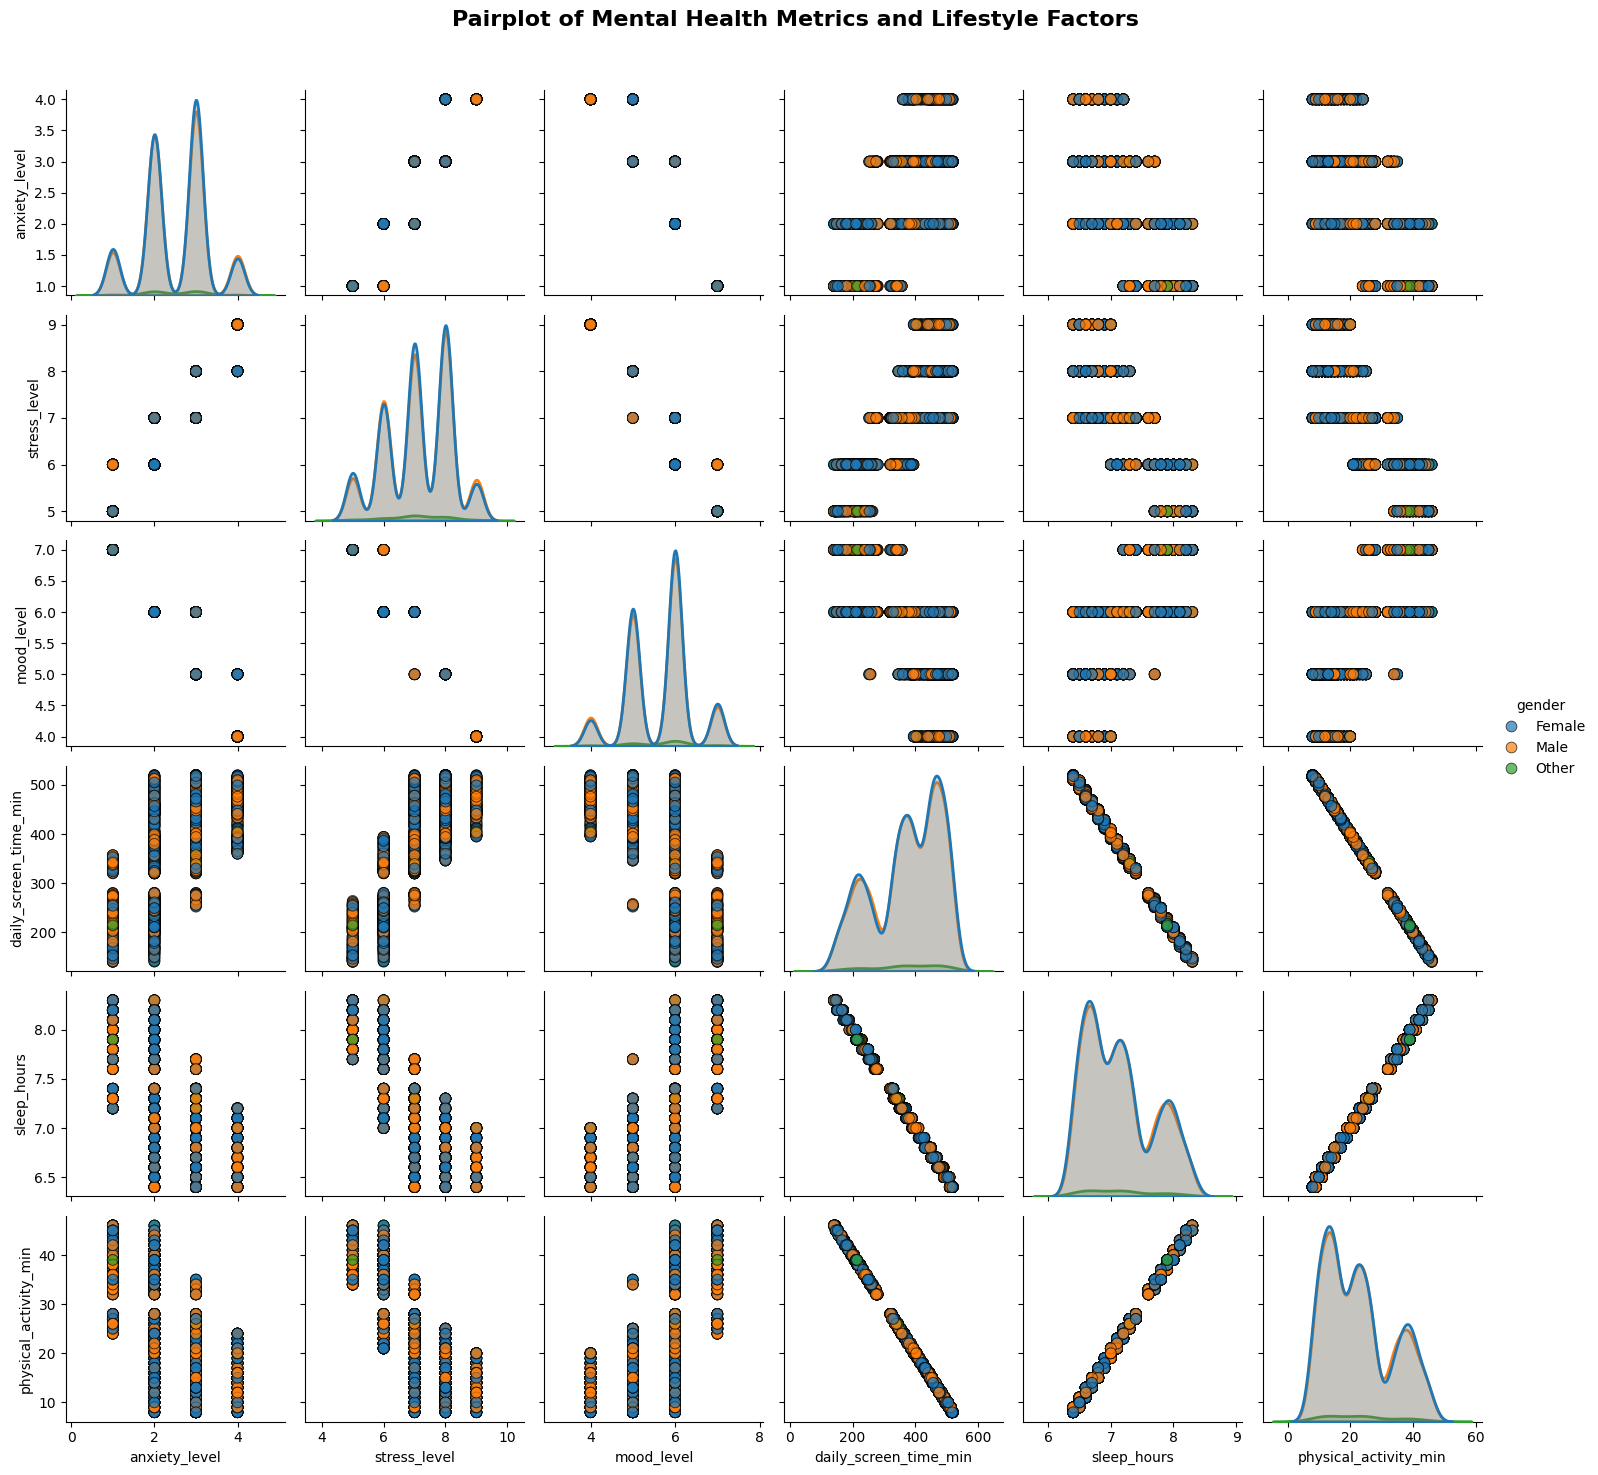

In [5]:
# Pairplot to visualise relationships between mental health metrics and lifestyle factors
sns.pairplot(df, vars=[
                "anxiety_level", "stress_level", "mood_level",
                "daily_screen_time_min", "sleep_hours", "physical_activity_min"
            ], 
            hue="gender",
            plot_kws={"alpha": 0.7, "s": 60, "edgecolor": "k"},
            diag_kws={"fill": True, "linewidth": 2})

# Add overall title
plt.suptitle('Pairplot of Mental Health Metrics and Lifestyle Factors', fontsize=16, fontweight='bold')

# Adjust spacing for suptitle and legend
plt.tight_layout(rect=[0, 0, 0.94, 0.96])

# Save figure and show
plt.savefig('../charts/pairplot_mental_health_metrics.png')
plt.show()

### Emotional health vs behaviour Summary

The pairplots reveal near-perfect linear and overlapping patterns across gender and behavioural variables, indicating that the dataset is synthetic and the relationships were likely generated using formulas rather than real-world observations.

---

## Scatter plots looking at trends

Create a function for creating a single scatter plot:

In [6]:
def plot_single_scatter(axes, df, x, y, title):
    '''
    Plots a single scatter plot on the given axes.
    
    Parameters:
    - axes: matplotlib axes object where the plot will be drawn.
    - df: DataFrame containing the data.
    - x: Column name for the x-axis.
    - y: Column name for the y-axis.
    - title: Title of the scatter plot.
    Returns:
    - None
    '''

    # Using regplot to add a regression line to the scatter plot
    sns.regplot(
        data=df,
        x=x,
        y=y,
        ax=axes,
        line_kws={"color": "red", "linestyle": "--", "linewidth": 2},
        order=2
    )
    axes.set_title(title)
    axes.set_xlabel(x.replace('_', ' ').title())
    axes.set_ylabel(y.replace('_', ' ').title())


Create 1x3 chart:

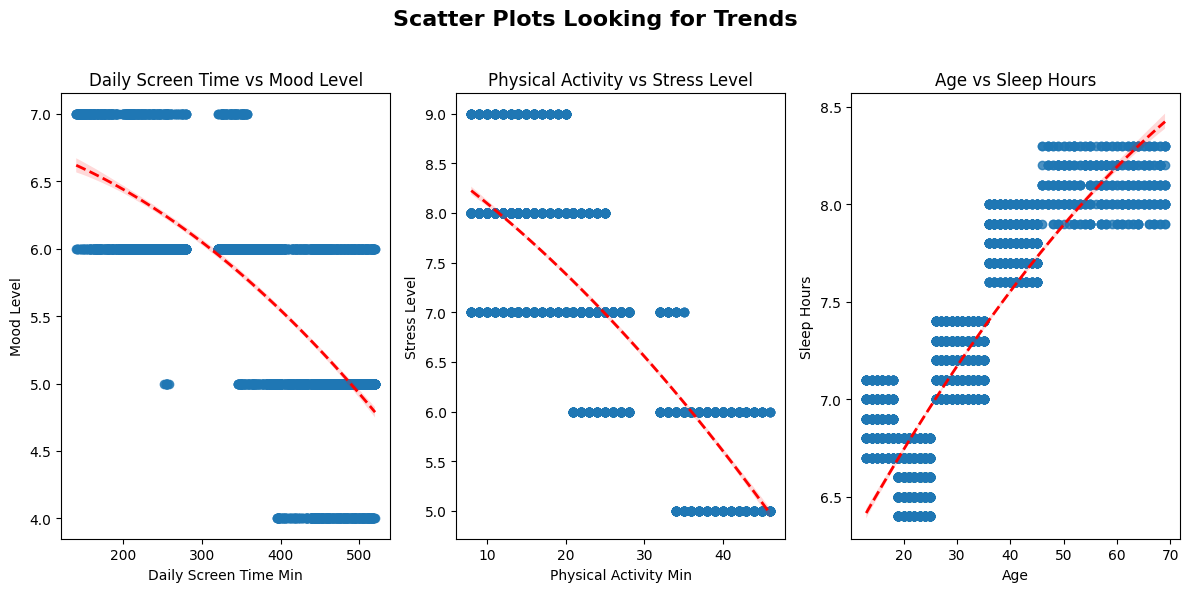

In [7]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Add scatter plots
plot_single_scatter(axs[0], df, 'daily_screen_time_min', 'mood_level', 'Daily Screen Time vs Mood Level')
plot_single_scatter(axs[1], df, 'physical_activity_min', 'stress_level', 'Physical Activity vs Stress Level')
plot_single_scatter(axs[2], df, 'age', 'sleep_hours', 'Age vs Sleep Hours')

# Add overall title
fig.suptitle('Scatter Plots Looking for Trends', fontsize=16, fontweight='bold')

# Adjust spacing for suptitle
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save figure and show
plt.savefig('../charts/scatter_plots_looking_for_trends.png')
plt.show()

### Summary

Again, you can see the very linear correlation showing higher screen time gives lower mood level, stress levels drop as physical activity increases and older people sleep longer.

---
## Violin plots by category

Create a function for creating a single violin plot:

In [ ]:
def plot_single_violin(axes, df, x, y, title):
    '''
    Plots a single violin plot.
    
    Parameters:
    - df: DataFrame containing the data.
    - x: Column name for the x-axis (categorical).
    - y: Column name for the y-axis (numerical).
    - title: Title of the violin plot.
    Returns:
    - None
    '''

    # Create violin plot
    sns.violinplot(data=df, x=x, y=y, inner=None, palette="pastel", hue=x, legend=False, ax=axes)
    # Overlay strip plot for individual data points
    sns.stripplot(data=df, x=x, y=y, color="black", size=3, jitter=True, alpha=0.3, ax=axes)
    
    axes.set_title(title)
    axes.set_xlabel(x.replace('_', ' ').title())
    axes.set_ylabel(y.replace('_', ' ').title())

Create 3x1 charts:

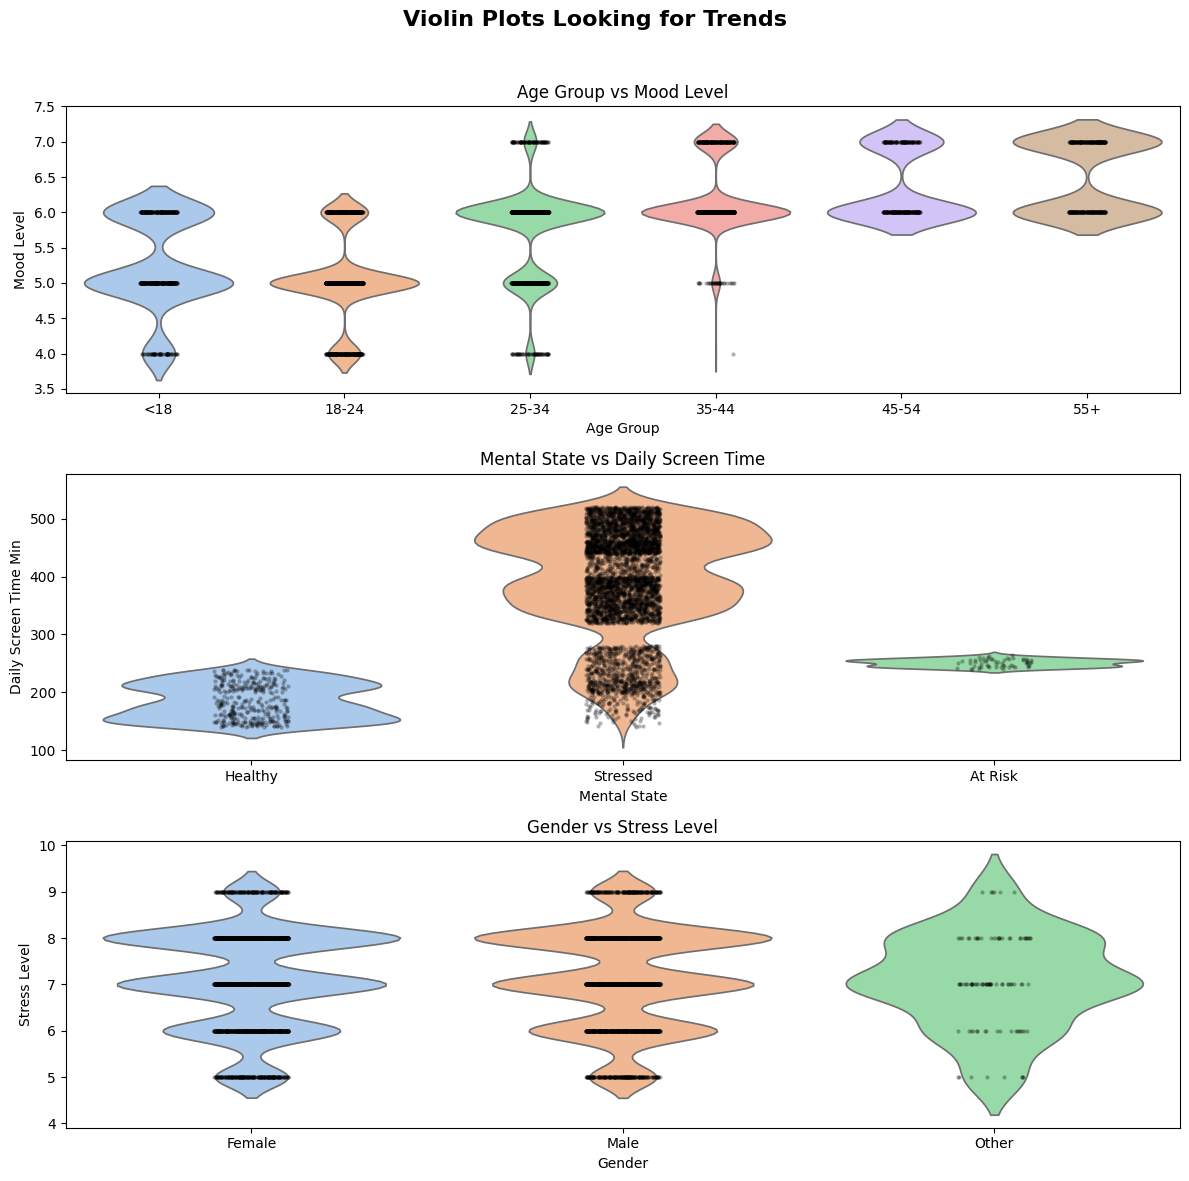

In [15]:
# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 12))

# Add violin plots
plot_single_violin(axs[0], df, 'age_group', 'mood_level', 'Age Group vs Mood Level')
plot_single_violin(axs[1], df, 'mental_state', 'daily_screen_time_min', 'Mental State vs Daily Screen Time')
plot_single_violin(axs[2], df, 'gender', 'stress_level', 'Gender vs Stress Level')

# Add overall title
fig.suptitle('Violin Plots Looking for Trends', fontsize=16, fontweight='bold')

# Adjust spacing for suptitle
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save figure and show
plt.savefig('../charts/violin_plots_looking_for_trends.png')
plt.show()

### Summary

The violin show the distribution with the individual dataploints added ontop via a stripplot.

The top chart clearly shows older people have higher mood levels.

The middle chart shows that healhy mental state has much lower screen time, at risk has moderate screen time and stressed mental state has a range of screen time from low to high but seems to be clustered in 3 groups.

The bottom chart shows that female and male genders are almost identical. Other is similar too but has much fewer observations so is hard to say.

---
## Group Statistics

Create a function to create a single group by bar chart:

In [31]:
def plot_group_by_bar(axes, df, group_by, columns, title):
    '''
    Plots a single grouped bar plot.
    
    Parameters:
    - axes: matplotlib axes object where the plot will be drawn.
    - df: DataFrame containing the data.
    - group_by: Column name to group the data by (categorical).
    - columns: List of column names to plot (numerical).
    - title: Title of the grouped bar plot.
    Returns:
    - None
    '''

    # Group by mean
    df_grouped = df.groupby(group_by, observed=False)[columns].mean().reset_index()

    # Melt to long format
    df_melted = df_grouped.melt(
        id_vars=group_by,
        value_vars=columns,
        var_name="Metric",
        value_name="Value"
    )

    # Plot grouped bar chart
    sns.barplot(
        data=df_melted,
        x=group_by,
        y="Value",
        hue="Metric",
        palette="pastel",
        ax=axes
    )

    # Set plot title and labels
    axes.set_title(title)
    axes.set_ylabel("Mean Value")
    axes.set_xlabel(group_by.replace("_", " ").title())



Create 3x1 charts:

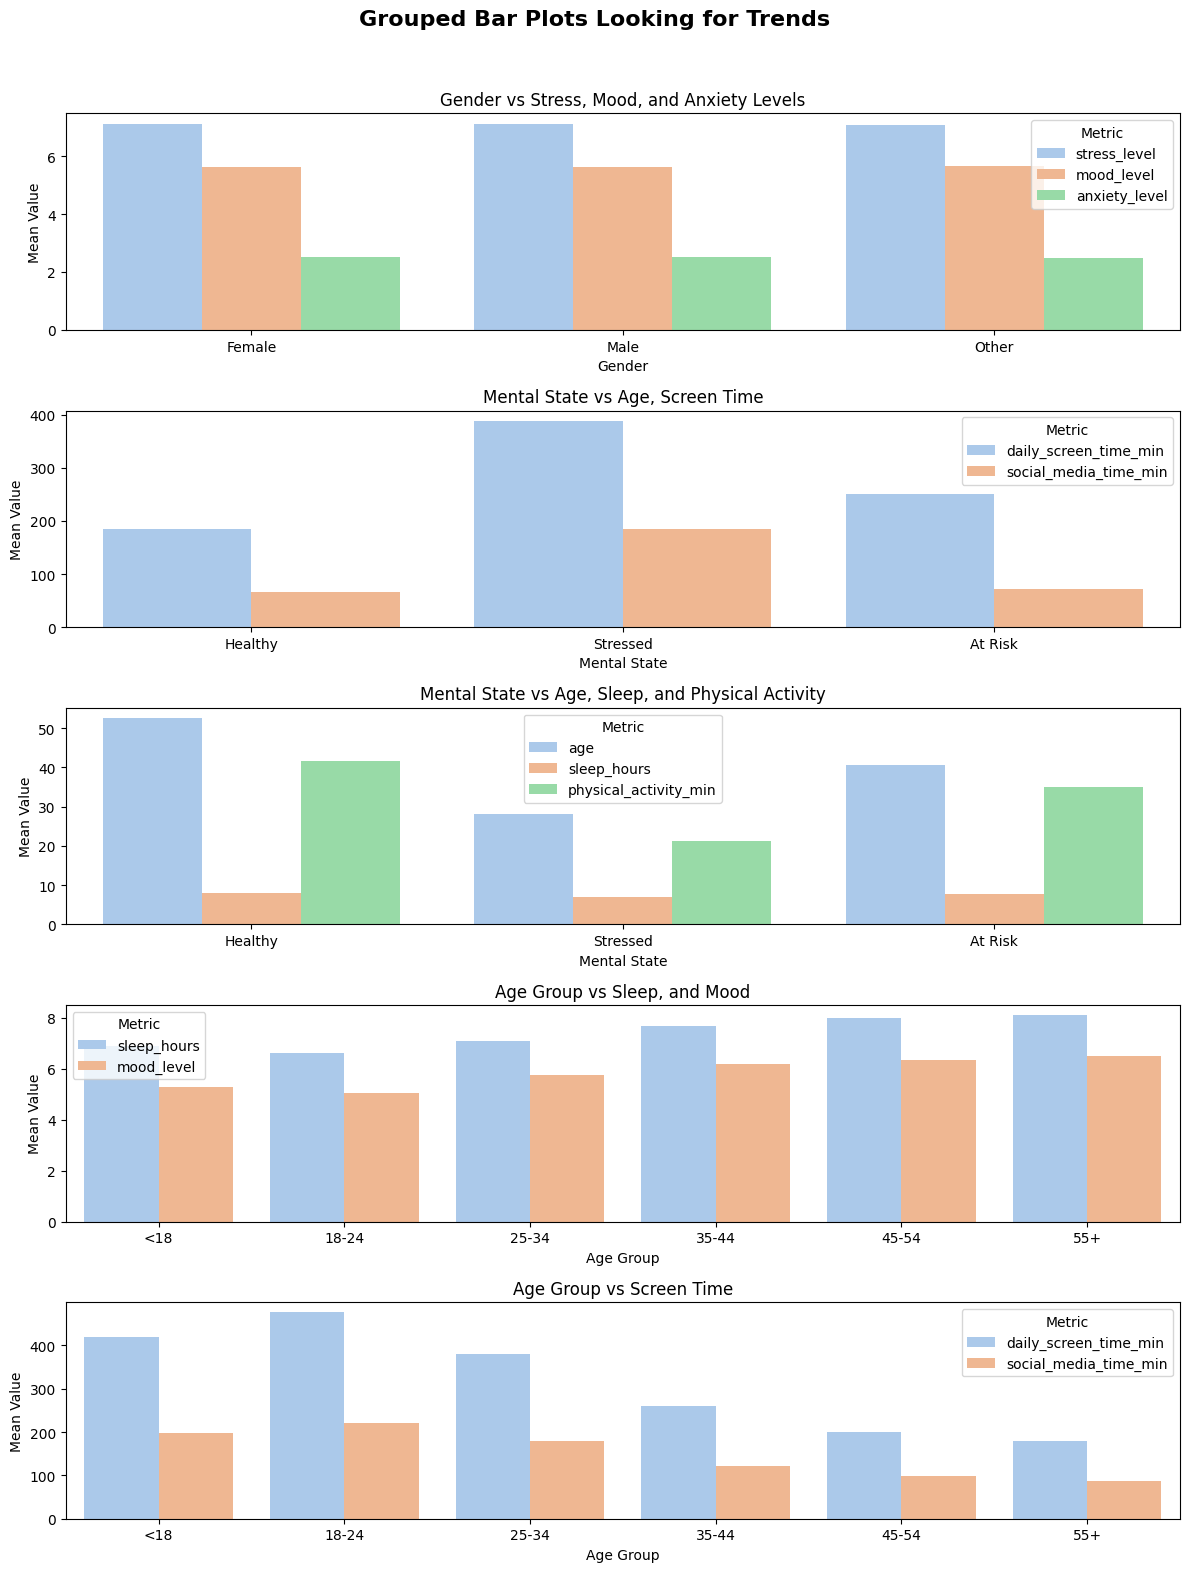

In [33]:
# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(12, 16))

# Add grouped bar plots
plot_group_by_bar(axs[0], df, 'gender', ["stress_level", "mood_level", "anxiety_level"], 'Gender vs Stress, Mood, and Anxiety Levels')
plot_group_by_bar(axs[1], df, 'mental_state', ["daily_screen_time_min", "social_media_time_min"], 'Mental State vs Age, Screen Time')
plot_group_by_bar(axs[2], df, 'mental_state', ["age", "sleep_hours", "physical_activity_min"], 'Mental State vs Age, Sleep, and Physical Activity')
plot_group_by_bar(axs[3], df, 'age_group', ["sleep_hours", "mood_level"], 'Age Group vs Sleep, and Mood')
plot_group_by_bar(axs[4], df, 'age_group', ["daily_screen_time_min", "social_media_time_min"], 'Age Group vs Screen Time')


# Add overall title
fig.suptitle('Grouped Bar Plots Looking for Trends', fontsize=16, fontweight='bold')

# Adjust spacing for suptitle
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save figure and show
plt.savefig('../charts/grouped_bar_plots_looking_for_trends.png')
plt.show()

### Summary

The first chart clearly shows gender has no effect and the data is the same across all 3 genders.

The second chart shows people who are stressed use screens and social media more. At risk and healthy people use screens less and social media less.

The third chart shows healthy people are older, younger people are more stressed and people at risk are around 35-40. Sleep is consitent across all mental states. Stressed people have lower phyiscial activity.

The fourth chart shows mood and sleep increases with age.

The firth chart shows screen time and social media increases as people move from chilldren to adult but then declines gradualy with age.